### Kutuphaneleri kuralım

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

### Verileri Çekelim

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### Verileri inceleyelim

In [4]:
train_data.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [6]:
train_data.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [7]:
train_data.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [9]:
test_data.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


### id sutununu silelim

In [10]:
del train_data['id']

In [11]:
del test_data['id']

### target sutununa bakalım

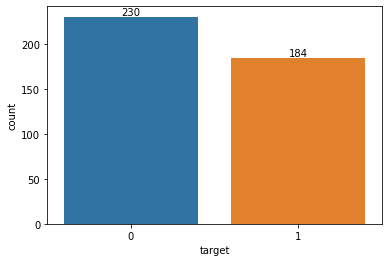

In [13]:
ax = sbn.countplot(x = train_data['target'])
ax.bar_label(ax.containers[0]);

### Corelasyon

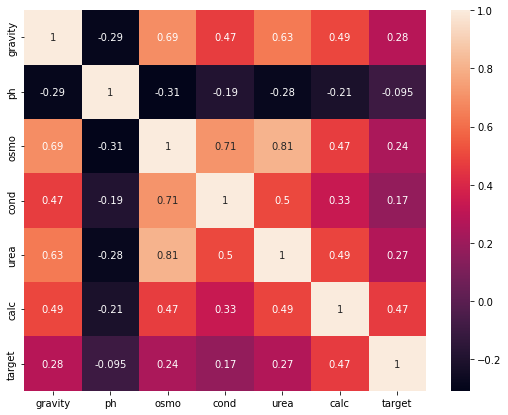

In [15]:
plt.figure(figsize = (9, 7))
sbn.heatmap(train_data.corr(), annot = True);

In [21]:
abs(train_data.corr()['target']).sort_values(ascending = False)

target     1.000000
calc       0.467439
gravity    0.282577
urea       0.265211
osmo       0.244770
cond       0.172224
ph         0.094983
Name: target, dtype: float64

### makine modellerinin başarılarını ölçelim(tum sutunlar dahil)

In [16]:
x = train_data.drop('target', axis = 1)
y = train_data['target']

In [17]:
x.shape, y.shape

((414, 6), (414,))

In [30]:
def classification(x, y):
    model1 = LogisticRegression()
    model2 = DecisionTreeClassifier()
    model3 = RandomForestClassifier()
    model4 = BernoulliNB()
    model5= GaussianNB()
    model6 = SVC()
    model7 = GradientBoostingClassifier()
    model8 = AdaBoostClassifier()
    model9 = HistGradientBoostingClassifier()
    model10 = BaggingClassifier()
    model11 = XGBClassifier()
    
    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11]
    model_names = ['Logistic', 'Decision', 'Random', 'Bernoulli', 'Gaussian', 'Support', 'Gradient',
                  'AdaBoost', 'Hist', 'Bagging', 'XGBoost']
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)
    
    acc = []
    f1 = []
    skor = pd.DataFrame(columns = ['Accuracy'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
        
    skor['Accuracy'] = acc

    
    #return skor.sort_values('Accuracy', ascending = False)
                                   
    print(skor.sort_values('Accuracy', ascending = False))
        

    plt.figure(figsize=(10, 6))
    
    sbn.barplot(data = skor, y ='Accuracy', x = skor.index, color = 'lightblue')
    for i, v in enumerate(skor['Accuracy']):
        plt.text(i, v, str(round(v, 2)), color='black', ha='center')
    plt.xlabel('Accuracy')
    plt.ylabel('Models')
    plt.title('Accuracy Scores of Classification Models')
    plt.show()

            Accuracy
Gaussian   81.927711
Logistic   77.108434
Support    74.698795
Hist       74.698795
Gradient   72.289157
Random     69.879518
AdaBoost   69.879518
XGBoost    67.469880
Bagging    63.855422
Decision   60.240964
Bernoulli  55.421687


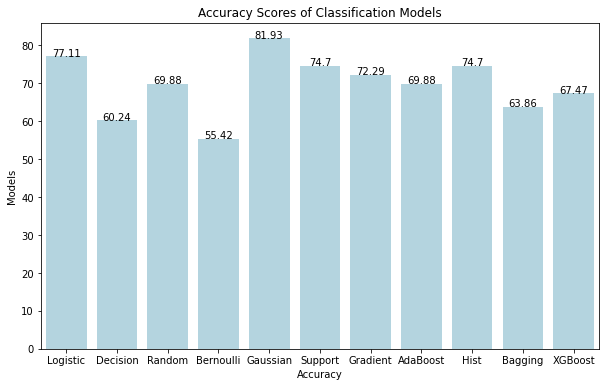

In [31]:
classification(x, y)

### makine modelleri basarısı corelasyona gore

In [32]:
x1 = train_data.drop(['cond', 'ph', 'target'], axis = 1)
y1 = train_data['target']

            Accuracy
Gaussian   80.722892
Logistic   78.313253
Support    77.108434
AdaBoost   73.493976
XGBoost    73.493976
Random     68.674699
Gradient   68.674699
Hist       68.674699
Bagging    66.265060
Decision   59.036145
Bernoulli  55.421687


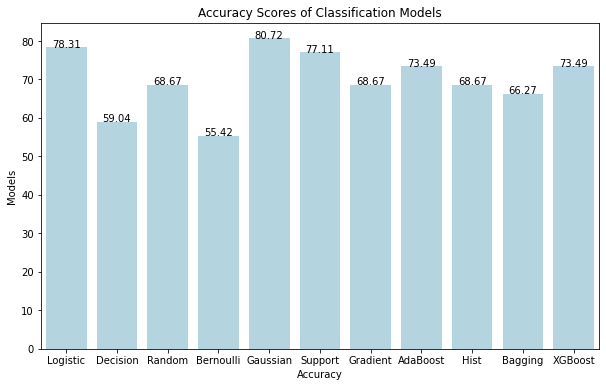

In [33]:
classification(x1, y1)

### Derin Öğrenme

In [34]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [35]:
model = Sequential()
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy') 

In [36]:
early = EarlyStopping(monitor = 'accuracy', patience = 10, mode = 'max')

In [37]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_true), epochs = 100, batch_size = 32, verbose = 1, callbacks = [early])

Epoch 1/100
11/11 [==============================] - 2s 33ms/step - loss: 0.6718 - accuracy: 0.6344 - val_loss: 0.5277 - val_accuracy: 0.7831
Epoch 2/100
11/11 [==============================] - 0s 16ms/step - loss: 0.5854 - accuracy: 0.7462 - val_loss: 0.5668 - val_accuracy: 0.6988
Epoch 3/100
11/11 [==============================] - 0s 15ms/step - loss: 0.5715 - accuracy: 0.7432 - val_loss: 0.5263 - val_accuracy: 0.7349
Epoch 4/100
11/11 [==============================] - 0s 14ms/step - loss: 0.5553 - accuracy: 0.7674 - val_loss: 0.5375 - val_accuracy: 0.7590
Epoch 5/100
11/11 [==============================] - 0s 14ms/step - loss: 0.5735 - accuracy: 0.7492 - val_loss: 0.5402 - val_accuracy: 0.7470
Epoch 6/100
11/11 [==============================] - 0s 14ms/step - loss: 0.5320 - accuracy: 0.7764 - val_loss: 0.5062 - val_accuracy: 0.7470
Epoch 7/100
11/11 [==============================] - 0s 18ms/step - loss: 0.5098 - accuracy: 0.7855 - val_loss: 0.5322 - val_accuracy: 0.7711
Epoch 

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3584      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               2

<AxesSubplot:>

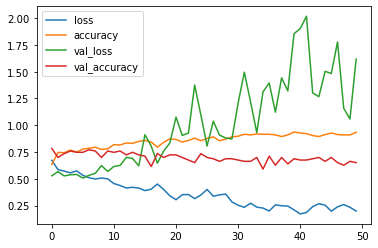

In [39]:
loss = pd.DataFrame(history.history)
loss.plot()

In [40]:
model.evaluate(x_train, y_train)

11/11 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.9547


[0.12953819334506989, 0.9546827673912048]

## tahmin

In [42]:
tahmin = model.predict(x_test)
tahmin = [1 if tahmin >= 0.5 else 0 for tahmin in tahmin]
accuracy_score(tahmin, y_true) * 100

3/3 [==============================] - 0s 2ms/step


65.06024096385542

### tahmin dosyasını oluşturalım

In [43]:
sonuc = pd.DataFrame(columns = ['id', 'target'])
sonuc['id'] = sample_submission['id']

In [44]:
model = GaussianNB()
model.fit(x, y)
tahmin = model.predict(test_data)

In [45]:
sonuc['target'] = tahmin

In [46]:
sonuc

,id,target
0,414,0
1,415,1
2,416,1
3,417,1
4,418,0
...,...,...
271,685,1
272,686,0
273,687,1
274,688,0


In [47]:
sonuc.to_csv('Gaussian.csv', index = False)